<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company more precisely:
<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges. 
<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
        <li>Exercise</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [ ]:
!pip install yfinance
!pip install matplotlib
# !pip install pandas==1.3.3

In [ ]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [ ]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [ ]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
apple_info

We can get the <code>'country'</code> using the key country


In [ ]:
apple_info['country']

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [ ]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [ ]:
apple_share_price_data.head()

We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [ ]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


In [ ]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [ ]:
apple.dividends

We can plot the dividends overtime:


In [ ]:
apple.dividends.plot()

## Exercise 


Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [ ]:
amd = yf.Ticker("AMD") 

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

In [ ]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
amd_info

<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.


In [ ]:
amd_info = amd.info
amd_info["country"] 

<b>Question 2</b> Use the key  <code>'sector'</code> to find the sector the stock belongs to, remember it as it will be a quiz question.


In [ ]:
amd_info["sector"] 

<b>Question 3</b> Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).


In [ ]:
amd_data = amd.history(period="max")
amd_data.reset_index(inplace=True)
amd_data.head()   # pour voir les 5 premières lignes

# Récupérer le volume du premier jour
amd_data.iloc[0]["Volume"] 

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


<!-- ## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>-->

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>


In [ ]:
# Q0 — Setup
!pip -q install yfinance bs4 lxml

import yfinance as yf
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 6)  # affichage plus court

In [23]:
# Q1 — Tesla stock with yfinance
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)   # Date devient une colonne
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
# Q2 — Tesla revenue via web scraping (Macrotrends)
def get_revenue_table(url):
    html = requests.get(url).text
    soup = BeautifulSoup(html, "html.parser")
    tables = pd.read_html(str(soup))
    for df in tables:
        cols = [c.strip().lower() for c in df.columns.astype(str)]
        if "date" in cols and "revenue" in cols:
            out = df.copy()
            out.columns = ["Date", "Revenue"]
            # clean up values ($, commas, dashes)
            out["Revenue"] = (out["Revenue"]
                              .astype(str)
                              .str.replace(r"[\$,]", "", regex=True)
                              .str.replace("-", "", regex=False)
                              .str.strip())
            out = out[out["Revenue"].str.len() > 0]
            out["Revenue"] = pd.to_numeric(out["Revenue"], errors="coerce")
            out.dropna(inplace=True)
            out["Date"] = pd.to_datetime(out["Date"])
            out.sort_values("Date", inplace=True)
            out.reset_index(drop=True, inplace=True)
            return out
    raise ValueError("Revenue table not found")

tesla_revenue = get_revenue_table(
    "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
)
tesla_revenue.head()

In [24]:
# Q0 — Setup
!pip -q install yfinance bs4 lxml

import yfinance as yf
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 6)  # shorter display

In [3]:
# Q1 — Tesla stock with yfinance
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)   # Make Date a normal column
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
!pip install pandas lxml html5lib bs4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 165.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 155.0 MB/s eta 0:00:00


In [8]:
import pandas as pd
import requests

# Define the URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Add headers to look like a normal browser
headers = {"User-Agent": "Mozilla/5.0"}

# Download the page
response = requests.get(url, headers=headers)

# Extract tables from the page
tables = pd.read_html(response.text)

# The revenue table is usually the second one
tesla_revenue = tables[1]

# Clean the dataframe
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Show first 5 rows
print(tesla_revenue.head()) 

         Date  Revenue
0  2025-06-30  $22,496
1  2025-03-31  $19,335
2  2024-12-31  $25,707
3  2024-09-30  $25,182
4  2024-06-30  $25,500


/tmp/ipykernel_301/1981963890.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


In [11]:
!pip install yfinance --quiet

In [12]:
import yfinance as yf
import pandas as pd

# Create the Ticker object
gme = yf.Ticker("GME")

# Get all available stock price history
gme_data = gme.history(period="max")

# Reset the index so Date becomes a normal column
gme_data.reset_index(inplace=True)

# Show first 5 rows
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [13]:
!pip install pandas requests lxml html5lib --quiet

In [14]:
import pandas as pd
import requests

# URL for GameStop revenue on Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Pretend to be a normal browser to avoid 403
headers = {"User-Agent": "Mozilla/5.0"}

# Download the page
response = requests.get(url, headers=headers)

# Extract all tables from the page
tables = pd.read_html(response.text)

# The revenue table is usually the second one
gme_revenue = tables[1].copy()

# Clean the dataframe
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]  # drop empty rows

# Optional: parse types (nice for plotting later)
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_revenue["Revenue"] = (
    gme_revenue["Revenue"]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
    .str.strip()
).astype(float)

# Show first 5 rows
print(gme_revenue.head())

        Date  Revenue
0 2025-07-31    972.0
1 2025-04-30    732.0
2 2025-01-31   1283.0
3 2024-10-31    860.0
4 2024-07-31    798.0


/tmp/ipykernel_301/1389630792.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


In [25]:
!pip install matplotlib --quiet

In [27]:
import yfinance as yf
import pandas as pd

# Create Tesla ticker
tesla = yf.Ticker("TSLA")

# Get full stock history
tesla_data = tesla.history(period="max")

# Reset index so Date becomes a column
tesla_data.reset_index(inplace=True)

# Show first 5 rows
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [28]:
print(tesla_revenue.head())

        Date  Revenue
0 2025-06-30  $22,496
1 2025-03-31  $19,335
2 2024-12-31  $25,707
3 2024-09-30  $25,182
4 2024-06-30  $25,500


TypeError: 'value' must be an instance of str or bytes, not a float

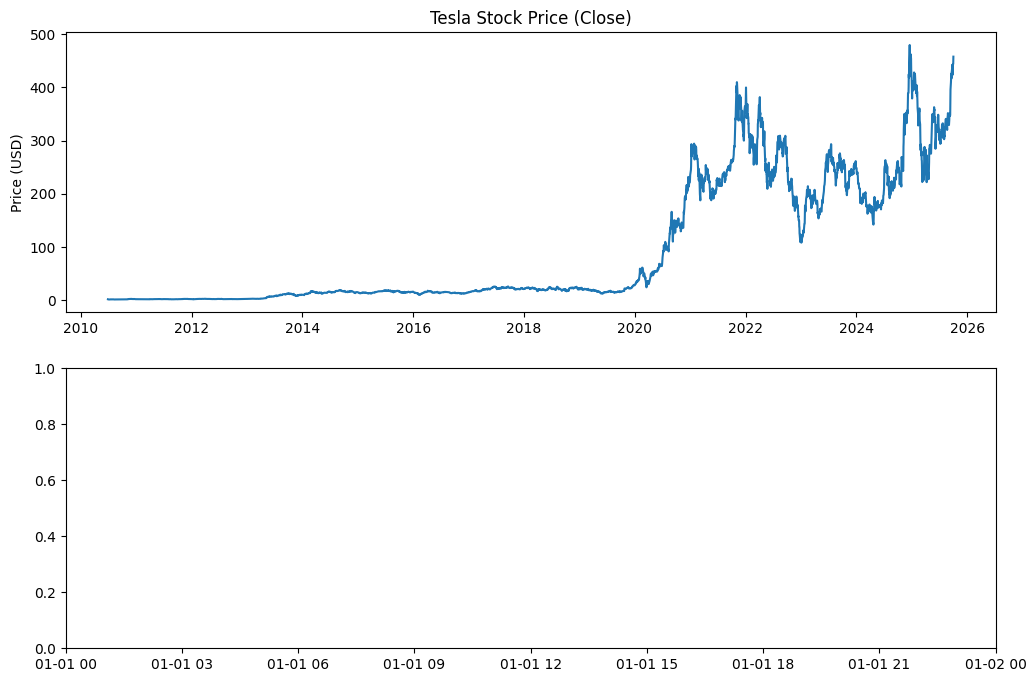

In [29]:
import matplotlib.pyplot as plt

# Convert Date columns to datetime
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

# 1) Tesla stock price (Close)
ax[0].plot(tesla_data["Date"], tesla_data["Close"])
ax[0].set_title("Tesla Stock Price (Close)")
ax[0].set_ylabel("Price (USD)")

# 2) Tesla revenue
ax[1].plot(tesla_revenue["Date"], tesla_revenue["Revenue"])
ax[1].set_title("Tesla Quarterly Revenue")
ax[1].set_ylabel("Revenue (USD)")
ax[1].set_xlabel("Date")

plt.tight_layout()
plt.show()